___
### <center> <u> <h1> <strong> Transformée de Fourrier Dans la musique </strong> </h1> </center>

<h3>
Dans ce notebook on verra en détails des exemples sur :
    
<strong> 

- Comment lire et charger un fichier audio à l'aide de bibliothèque Python

- La construction d'une classe Python qui automatise des procédés de traitement et de visualisation du signal

- La composition spectrale des notes de musique

- La composition spectrale de composition musicales au piano et au violon
    
- la composition spectrale d'un bruit donné
    

</strong>
</h3>
    
---

<h2> <strong> 1 - Importation des modules necessaires

In [1]:
################################################################################
##################  Bibliothèque utilitaire mathémlatiques  ####################
################################################################################
import numpy as np

################################################################################
##################         Bibliothèque graphique           ####################
################################################################################
import matplotlib.pyplot as plt

################################################################################
################  Bibliothèque utilitaire de fichiers audios  ##################
################################################################################
try : 
    import librosa
except :
    !pip install --upgrade pip
    !pip install librosa
    import librosa

################################################################################
##################    Bibliothèque de gestion du système    ####################
################################################################################
import os

################################################################################
######  Bibliothèque pour l'écoute de fichiers audio dans notre cas   ##########
################################################################################
import IPython.display as ipd

try :
    from tqdm import tqdm
except :
    ! pip install tqdm
    from tqdm import tqdm

<h2> <strong> 2 - Chemin vers les notes

- ### Les notes musicales se trouvent dans le repertoire `Notes` situé dans le repertoire courant

In [2]:
os.listdir(".")

['.ipynb_checkpoints',
 'audio',
 'Notes',
 'Transformée de Fourier dans la musique.ipynb']

- ### Le contenu du repertoire `Notes` est le suivant

In [3]:
os.listdir("Notes")

['Piano_C4.wav', 'piano_c5.wav', 'sax_c4.wav', 'violin_c4.wav']

- ### Ces noms de fichiers peuvent être conservés dans une variable sous forme de liste de la façon qui suit

In [4]:
audio_list = os.listdir( os.path.join(os.getcwd(), "Notes" ) )    #  audio_list = os.listdir("audio") abouti au même résultat
audio_list

['Piano_C4.wav', 'piano_c5.wav', 'sax_c4.wav', 'violin_c4.wav']

- ### Éssayons de rassembler les chemins qui menent vers ces fichiers dans une variable qui permettra par la suite d'y accéder, ouvrir et manipuler ces audios plus facilement

J'utilise ici un chemin relatif et non absolu

In [5]:
audio_path_list = [ "/".join( [".","Notes", i] ) for i in audio_list ]
audio_path_list

['./Notes/Piano_C4.wav',
 './Notes/piano_c5.wav',
 './Notes/sax_c4.wav',
 './Notes/violin_c4.wav']

<h2> <strong> 3 - Lecture et audition des Notes

In [6]:
for i in range(len(audio_list))  :
    print(f"{i+1} - Titre de la note : {audio_list[i]}  \n",)
    display(ipd.Audio(audio_path_list[i]))
    print()

1 - Titre de la note : Piano_C4.wav  




2 - Titre de la note : piano_c5.wav  




3 - Titre de la note : sax_c4.wav  




4 - Titre de la note : violin_c4.wav  



<h2> <strong> 4 - Chargement des Notes sous forme discrète : Array like

- ### À l'aide de la bibliothèque `librosa` je vais charger chaque audio sous forme discrète et la liste de toutes ces notes sera conservée dans une seule liste; chaque audio sera uniquement chargé sur les 2 premières secondes

In [7]:
audio_discrete = [ ]
sr = 35000

for i in tqdm( range( len( audio_list ) ) ):
    x = librosa.load( audio_path_list[i] , sr = sr)
    audio_discrete.append( x[0] )

100%|██████████| 4/4 [00:01<00:00,  2.44it/s]


In [8]:
audio_discrete[0]

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        2.2127466e-07, -3.4245727e-07,  0.0000000e+00], dtype=float32)

In [9]:
audio_discrete[0].shape

(105181,)

- ### Nombre de Trames par seconde

In [10]:
sr

35000

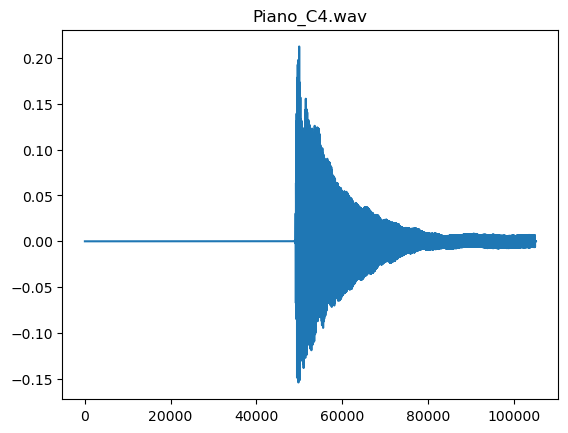

In [11]:
n = 0
plt.plot( audio_discrete[n] )
plt.title(audio_list[n])
plt.show()

<h2> <strong> 5 - Décomposition spectrale des notes

- ### Nous allons à présent éffectuer une Transformée de Fourier des signaux, les représenter et les analyser en utilisant <a href="https://github.com/Brice-KENGNI-ZANGUIM/Signal_Processing/blob/main/1%20-%20Transform%C3%A9e%20de%20Fourier%20-%20Spectre%20-%20Atuomatisation/Transform%C3%A9e%20de%20Fourrier%20et%20spectre%20de%20frequence.ipynb"  target="blank"> la classe Python définie dans le notebook suivant </a>  en y apportant quelques améliorations pour obtenir des fonctionalités un peu plus avancée par rapport au niveau du problème rencontré dans le notebook ici présent

In [12]:
class Fourrier_Transform(  ):
    N_instances = 0

    def __init__( self, frequences = None, function = None , sampling_rate = None , maximum_frequence = None ) :
        """
        DESCRIPTION : 
        ------------
            Constructeur de la classe qui defini et construit les variables pertinentes
        
        PARAMETRES : 
        -----------
            - Frequences : String or Numpy Array
                Variable contenant les fréquences. Pour utiliser un seul signal harmonique de fréquence 200 Hz, la variable peut prendre la valeur "200".
                Si par contre on désire supperposer deux signaux harmoniques de fréquences 100 et 200 Hz elle prends la valeur "100 200"; l'espace laissé entre les
                deux valeurs signfie qu'il y a addition des signaux. Si par contre il faut multiplier les signaux alors donner la valeur "100*200" et plus 
                généralement s'il faut utiliser un signal résultat de l'addition d'une multiplication de signaux il faut envoyer les valeurs
                sous la forme "100*60 300"; ce qui signifie que le signal résulte de la multiplication de deux signaux harmoniques de fréquence 100 et 60 Hz puis
                additionné à un signal de fréquence 300 Hz.
                    
            - function: func, str, np.array
                Lambda fonction à employer comme noyau à la fonction périodique si on ne voudrait pas utiliser de fonction harmonique. laisser la valeur par defaut `None`
                dans le cas contraire. En combinant diverses valeurs des variables `frequences` et `function` il est possible de construire différents types de signaux 
                périodiques. On peut lui attribuer les valeurs "carré", "triangle", "neg_exp" et "pos_exp" pour les fonctions associées carré, dent de scie et expo.
            
            - sampling_rate : int
                Sample Rate associé à la fonction temporelle si la fonction est directement fournie sous forme d'arrays de données discrètes
                    
        OUTPUT :  None
        ------- 
        
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        ####################################################################################
        #####################         Fonctions et sampling rate         ###################
        ####################################################################################
        self.function = function
        
        if isinstance( self.function, ( list, type( np.array( [ 10 , 0 ] ) ) ) )  :
            try :
                self.sr = sampling_rate
            except :
                print("Veillez fourinir la valeur de la variable 'sampling_rate'")
                
            self.signal = self.function
            
            self.N = self.signal.size
            
            self.duration = self.N/self.sr
            
            self.t = np.linspace( 0 , self.duration, self.N )
            
            self.t_step = self.t[1]
            
            self.f  = np.fft.fftfreq( self.N, self.t_step )
            
            if maximum_frequence is not None :
                self.F_max = maximum_frequence
            else :
                self.F_max = self.sr/10
            
            
            
        else :
            ####################################################################################
            #####################     Fréquences et périodes des signaux     ###################
            ####################################################################################
            if frequences : 
                if isinstance( frequences, str) :
                    Fs = self.remove_blank_space(frequences).split(" ")
                    for i in range( len( Fs ) ) :
                        Fs.insert( i , np.array([ float(j) for j in Fs[i].split("*") ]) )
                        del Fs[i+1]
                    Fs = np.array(Fs , dtype=object)

            self.Fs = Fs

            self.Ts = map( lambda x : 1./x ,  self.Fs  )
            self.Ts = self.from_map_to_array( self.Ts )

            ####################################################################################
            ###############    Fréquence maximale dans l'espace des fréquence     ##############
            ####################################################################################
            if maximum_frequence is not None :
                self.F_max = maximum_frequence
            else :
                self.F_max = max( 15*self.minim(self.Fs), self.maxim(self.Fs) + 5*self.minim(self.Fs) )*np.sqrt(Fs.size)

            ####################################################################################
            #########################  Plus petit intervall de temps    ########################
            ####################################################################################
            self.t_step = 0.001*self.minim(self.Ts)

            ####################################################################################
            #######################       Durée du signal        ###############################
            ####################################################################################
            self.duration = 8*self.maxim(self.Ts)

            ####################################################################################
            ################   Nombre d'échantillons en temps; discrétisation   ################
            ####################################################################################
            self.N = int(self.duration/self.t_step)

            ####################################################################################
            #### Étendue temporelle du signal : échantillon du temps sur toute sa durée   ######
            ####################################################################################
            self.t = np.linspace( 0 , self.duration , self.N )

            ####################################################################################
            ###################         Échantillonage en fréquence          ###################
            ####################################################################################
            self.f  = np.fft.fftfreq(self.N, self.t[1])

        ####################################################################################
        ##################        Incrément du nombre d'instances         ##################
        ####################################################################################
        self.N_instances += 1
        
    def transform( self, ) :
        """
        DESCRIPTION : 
        ------------
            Applique une transformée de Fourrier
        
        OUTPUT :  tupple
        ------- 
            Renvois un tupple de 2 listes représentante respectivement les modules | FFT | et les argument Arg(FFT) de la transformée de Fourrier pour une fréquence donnée
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        ###########################################################################
        ######################     Signal à transformer      ######################
        ###########################################################################
        
        if self.function is not None :
            if isinstance( self.function, ( list, type( np.array( [ 10 , 0 ] ) ) ) ) :
                pass

            else :
                self.signal = 0.
                if self.function == "carré" :
                    for i in self.Fs :
                        prod = 1.
                        for j in i :
                            prod *=  self.t%(1./j) > 1/(2.*j)

                        self.signal += prod

                elif self.function == "triangle" :
                    for i in self.Fs :
                        prod = 1.
                        for j in i :
                            prod *= self.t%(1./j)

                        self.signal += prod

                elif self.function =="neg_exp" :
                    for i in self.Fs :
                        prod = 1.
                        for j in i :
                            prod *= np.exp( -3.*j*(self.t%(1./j)) )

                        self.signal += prod

                elif self.function == "pos_exp" :
                    for i in self.Fs :
                        prod = 1.
                        for j in i :
                            prod *= np.exp( 3.*j*(self.t%(1./j)) )

                        self.signal += prod

                else :
                    for i in self.Fs :
                        prod = 1.
                        for j in i :
                            prod *= self.function( 3*j*(self.t%(1./j)) )

                        self.signal += prod
                        
        else:
            self.signal = 0.
            for i in self.Fs :
                prod = 1.
                for j in i :
                    prod *= np.sin(2*np.pi*j*self.t)

                self.signal += prod
                
        ###########################################################################
        ######################     Transformée du signal     ######################
        ###########################################################################
        FFT = np.fft.fft(self.signal)

        ###########################################################################
        ####### Réduction du résultat en dessous d'une fréquence maximale  ########
        ###########################################################################
        filtre = np.abs(self.f) <= self.F_max
        FFT = FFT[filtre]
        self.f = self.f[filtre]

        ###########################################################################
        ######################       Module et argument      ######################
        ###########################################################################
        FFT_mag = np.abs(FFT)
        FFT_arg = np.angle(FFT, deg=True)

        ###########################################################################
        ###################   Suppression des fréquences négatives  ###############
        ###########################################################################
        self.N = self.f.size
        self.f_pos = self.f[1:self.N//2]
        self.FFT_mag_pos = FFT_mag[1:self.N//2]
        self.FFT_arg_pos = FFT_arg[1:self.N//2]
        
        return self.FFT_mag_pos, self.FFT_arg_pos
        
    def plot( self, style= "SMA" , title = "", figsize = (10,8) ) :
        """
        DESCRIPTION : 
        ------------
            Affiche respectivement le signal, le spectre  d'Amplitude et le spectre de Phase
            
        PARAMETRES :
        -----------
            - style: str
                Chaine de caractères qui indique le type de graphe à afficher. La chaine de caractère peut contenir essentiellemetn les lettres 'S':Signal ,'M':Module et 
                'A': Argument. En fonction de la chaine de caractère qui est affichée, le graph affichera simultanément ou l'un des trois graphes correspondant au signal,
                au module et à l'argument.
        
        OUTPUT : None
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        while len(style) > 3 :
            style = input(f"La variable 'style' ne doit contenir que 3 caractère au maximum. La valeur actuelle est : {style}\n Veillez entrer une nouvelle valeur")
        
        fig, ax = plt.subplots(nrows= len(style), ncols=1, figsize= figsize)
        fig.suptitle(title, size = figsize[0]*2)
        style = list(style.upper())
        style.sort(reverse=True)
        style = "".join(style)
        
        for i in range(len(ax)) :
            ###########################################################################
            ###################           Affichage du signal           ###############
            ###########################################################################
            if "S" in style :
                ax[style.find("S")].plot(self.t, self.signal, color= 'blue', )
                ax[style.find("S")].set_xlabel("Temps ( sec )")
                ax[style.find("S")].set_ylabel("Amplitude")
                ax[style.find("S")].title.set_text("Evolution du signal")

            ###########################################################################
            ###################     Affichage du spectre en fréquence   ###############
            ###########################################################################
            if "M" in style :
                ax[style.find("M")].plot(self.f_pos, self.FFT_mag_pos, color="green")
                ax[style.find("M")].set_xlabel("Freq ( Hz )")
                ax[style.find("M")].set_ylabel("| FFT |")
                ax[style.find("M")].title.set_text("Spectre d'Amplitude du signal")

            ###########################################################################
            ###################      Affichage du spectre de phase      ###############
            ###########################################################################
            if "A" in style :
                ax[style.find("A")].plot(self.f_pos, self.FFT_arg_pos, color="magenta")
                ax[style.find("A")].set_xlabel("Freq ( Hz )")
                ax[style.find("A")].set_ylabel("Phase ( deg )")
                ax[style.find("A")].title.set_text("Spectre d'Argument du signal")

        plt.tight_layout()
        
        plt.show()
    
    def minim(self, x) :
        """
        DESCRIPTION : 
        ------------
            Calcul le minimum de toutes les valeurs contenues dans une ittérable obtenu par la fonction map()
            
        PARAMETRES :
        -----------
            - x : itterable
        
        OUTPUT : int, float
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return min([min(i) for i in x])

    def maxim(self, x) :
        """
        DESCRIPTION : 
        ------------
            Calcul le maximum de toutes les valeurs contenues dans une ittérable obtenu par la fonction map()
            
        PARAMETRES :
        -----------
            - x : itterable
        
        OUTPUT : int, float
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return max([max(i) for i in x])
    
    def from_map_to_array( self , x ) :
        """
        DESCRIPTION : 
        ------------
            Converti une variable itterable obtenu par la fonction map() en une variable de type numpy array
            
        PARAMETRES :
        -----------
            - x : itterable
        
        OUTPUT : np.array
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return np.array([ np.array(i) for i in x ], dtype=object)
    
    def remove_blank_space(self, x) :
        """
        DESCRIPTION : 
        ------------
            Rétire les espaces vides qui se trouvent en début ou à la fin d'une chaine de caractère
            
        PARAMETRES :
        -----------
            - x : str
        
        OUTPUT : str
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        if x[-1] == " " :
            while x[-1] == " " :
                x = x[:-1]
                
        if x[0] == " " :
            while x[0] == " " :
                x = x[1:]
        
        return x
    
    def pic_spectral( self,  f_min , f_max ) :
        """
        DESCRIPTION : 
        ------------
            Recherche la fréquences correspondant à un maximum d'amplitude spectral dans une bande de fréquence donnée du spectre d'amplitude du signal
            
        PARAMETRES :
        -----------
            - f_min , f_max : float
                borne inférieur et supperieur de la bande de fréquence où doit être recherché le maximum. La bande de fréquence est alors definie comme [f_min, f_max]
        
        OUTPUT : ( float, float )
        ------- 
            Fréquence et Amplitude  du spectre correspondant à un maximum de fréquence et d'amplitude dans la bande de fréquence précisée
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        filtre = (self.f_pos >= f_min) * (self.f_pos <= f_max)
        freq = self.f_pos[filtre]
        mag = self.FFT_mag_pos[filtre]
        
        return freq[mag.argmax()], mag.max()

<h1> <strong> Piano note C4

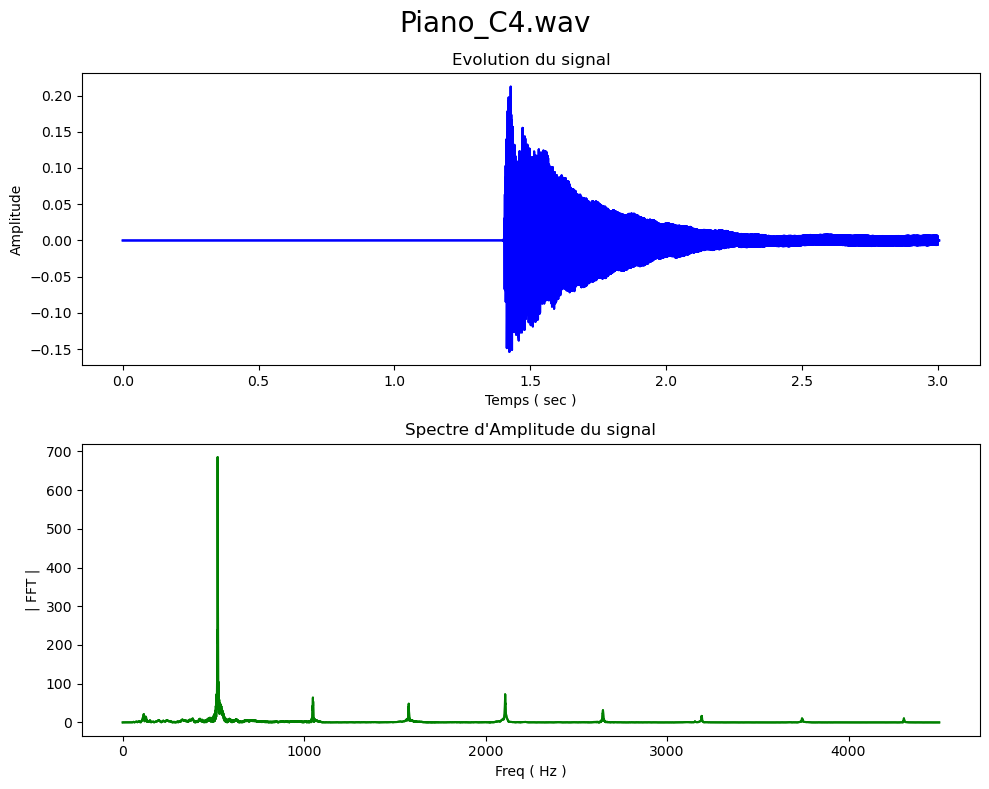

In [35]:
n = 0

FFT1 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4500)
FFT1.transform()
FFT1.plot( style = "MS", title= audio_list[n])

- ### Premier pic spectral

In [36]:
FFT1.pic_spectral(0,400)

(116.46479434592145, 21.57722056215437)

- ### Second pic spectral

In [37]:
FFT1.pic_spectral(500,600)

(523.4260614460984, 685.0442185382478)

- ### Trosième pic spectral

In [38]:
FFT1.pic_spectral(1000,1200)

(1048.515905668567, 64.18894898332867)

- ### Quatrième pic spectral

In [39]:
FFT1.pic_spectral(1500,1700)

(1576.6005588885023, 48.40160454816252)

- ### Cinquième pic spectral

In [40]:
FFT1.pic_spectral(2000,2300)

(2107.680021105904, 72.71740215196284)

<h1> <strong> Piano note C5

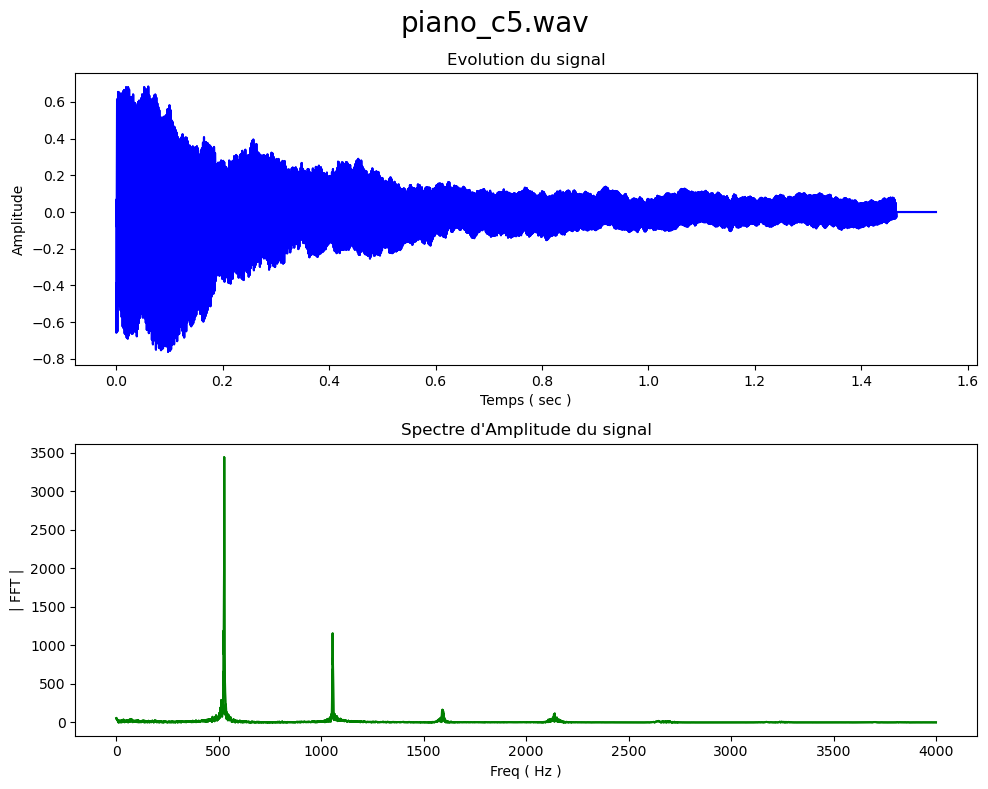

In [27]:
n = 1

FFT2 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT2.transform()
FFT2.plot( style = "MS", title= audio_list[n])

- ### Premier pic spectral

In [28]:
FFT2.pic_spectral(500,600)

(527.0869265050188, 3446.0579889441337)

- ### Second pic spectral

In [29]:
FFT2.pic_spectral(1000,1200)

(1056.1212185020513, 1156.5802732855461)

- ### Trosième pic spectral

In [30]:
FFT2.pic_spectral(1500,1700)

(1591.6467288057956, 165.26681355685201)

- ### Quatrième pic spectral

In [31]:
FFT2.pic_spectral(2000,2300)

(2139.505553892293, 116.15301231029261)

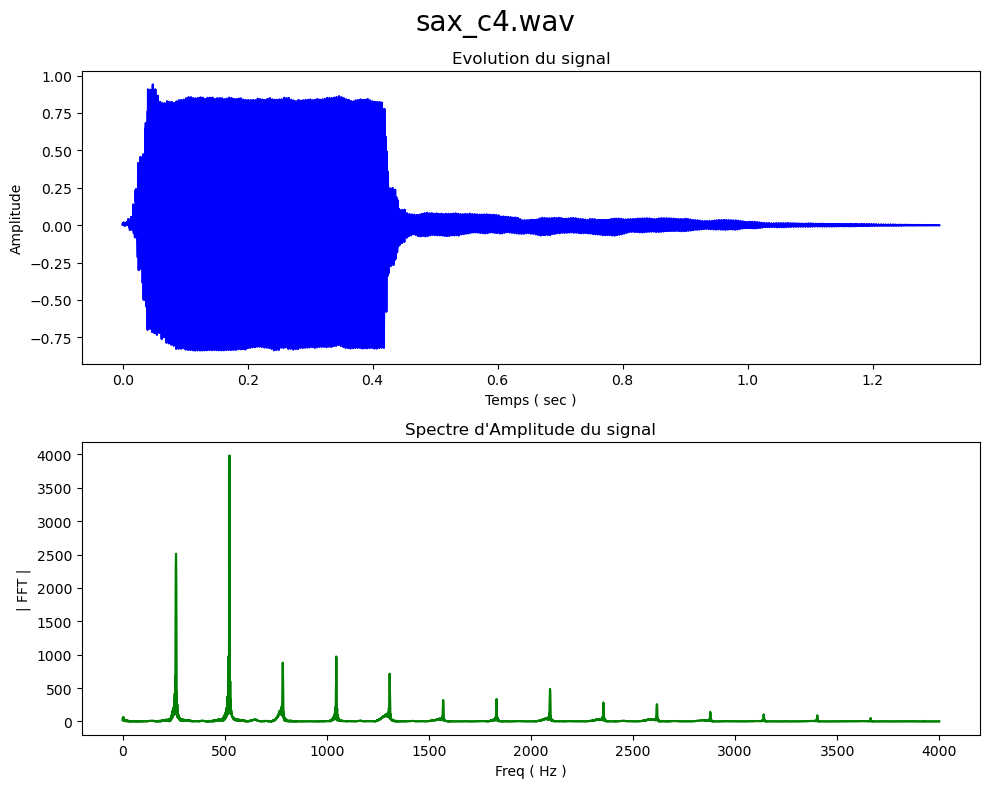

In [32]:
n = 2

FFT3 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT3.transform()
FFT3.plot( style = "MS", title= audio_list[n])

- ## <strong> Discussion  </strong>

<h3>
<ol>
    <li> On remarque que la note C5 jouée au piano possède une fondamentale qui se situe autour de 527 Hz ;  </li>
    <li> La fréquence fondamentale possède la plus grande force, amplitude ou volume </li>
    <li> La force des harmoniques successives suit une décroissance très rapide </li>
    <li> Si on souhaite reconstituer la note, les 5 premières harmoniques à elles seules pourraient être suffisantes </li>
</ol>
</h3>

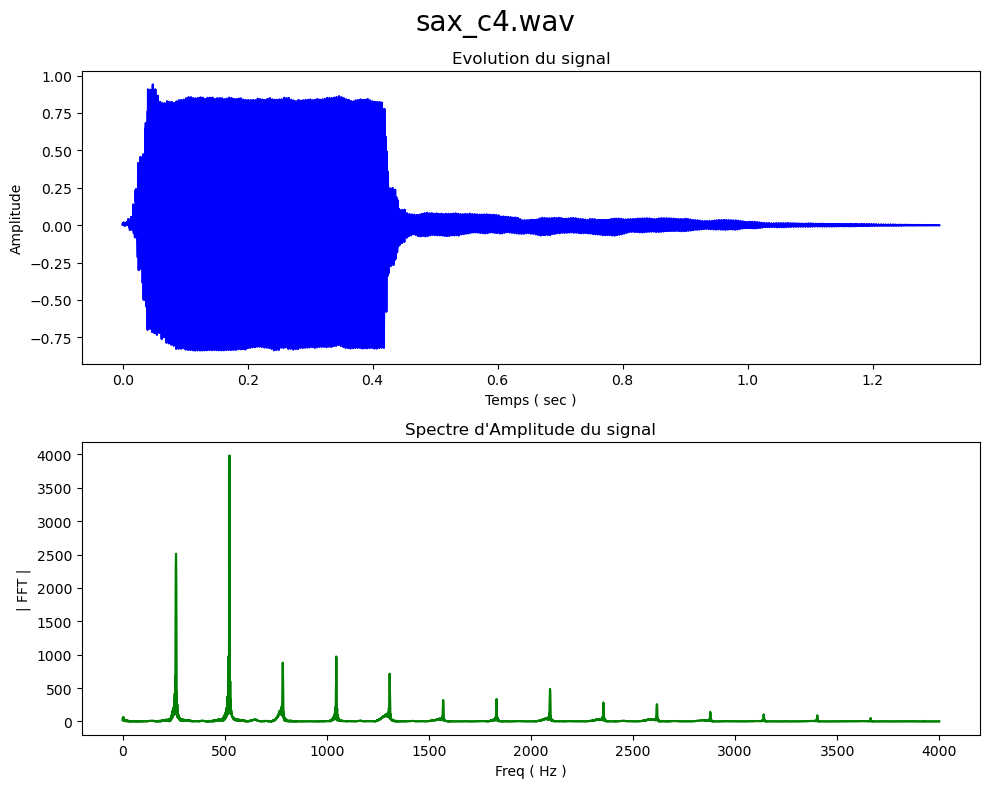

In [20]:
n = 2

FFT3 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT3.transform()
FFT3.plot( style = "MS", title= audio_list[n])

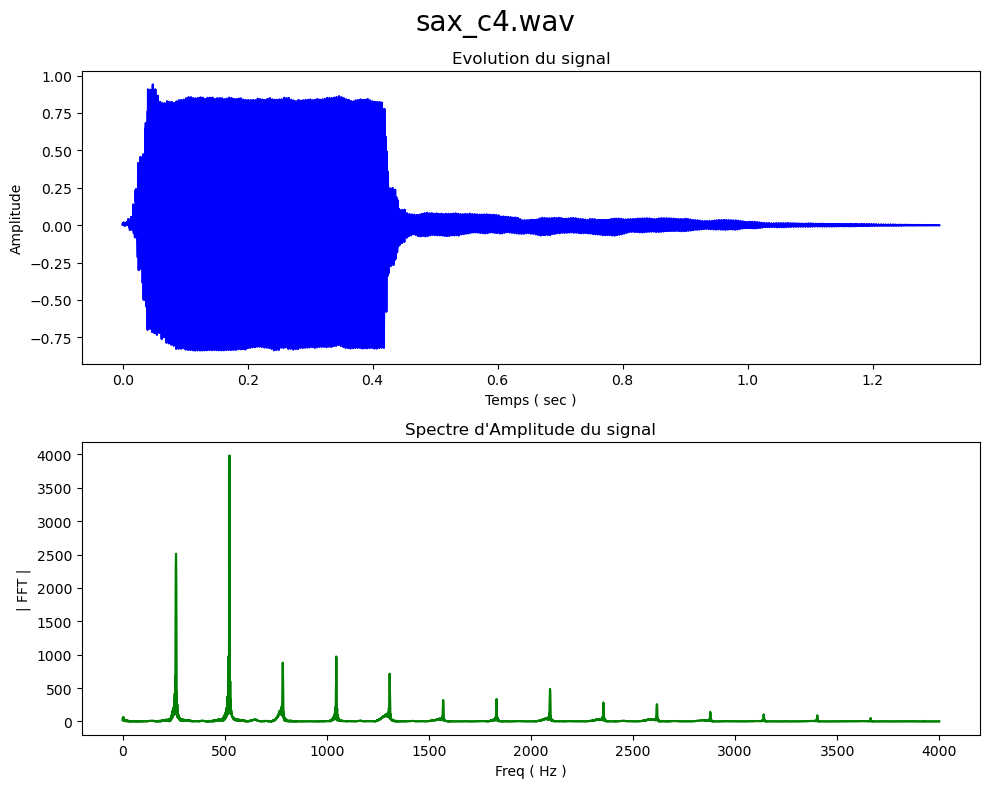

In [20]:
n = 2

FFT3 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT3.transform()
FFT3.plot( style = "MS", title= audio_list[n])

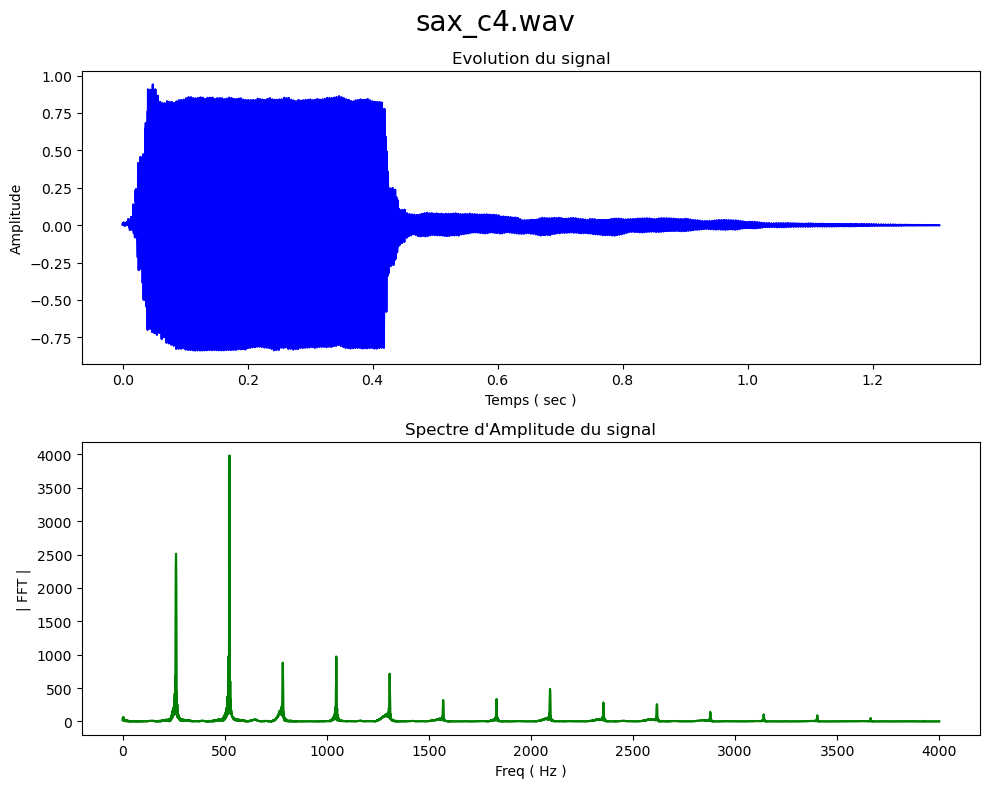

In [20]:
n = 2

FFT3 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT3.transform()
FFT3.plot( style = "MS", title= audio_list[n])

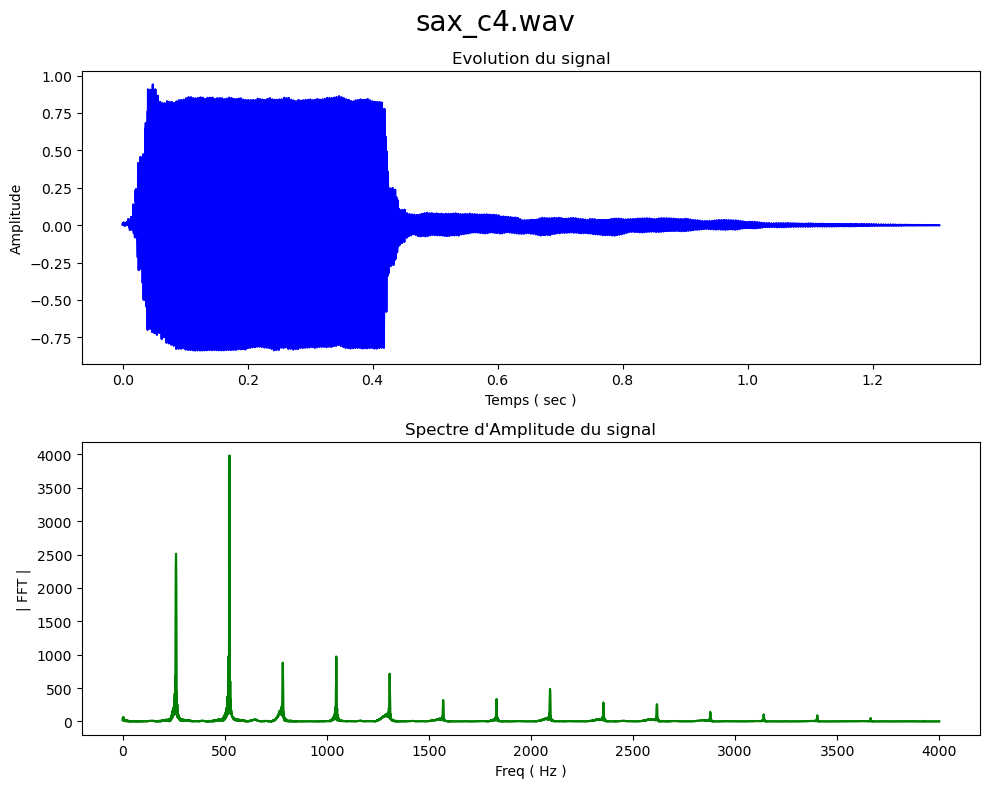

In [20]:
n = 2

FFT3 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT3.transform()
FFT3.plot( style = "MS", title= audio_list[n])

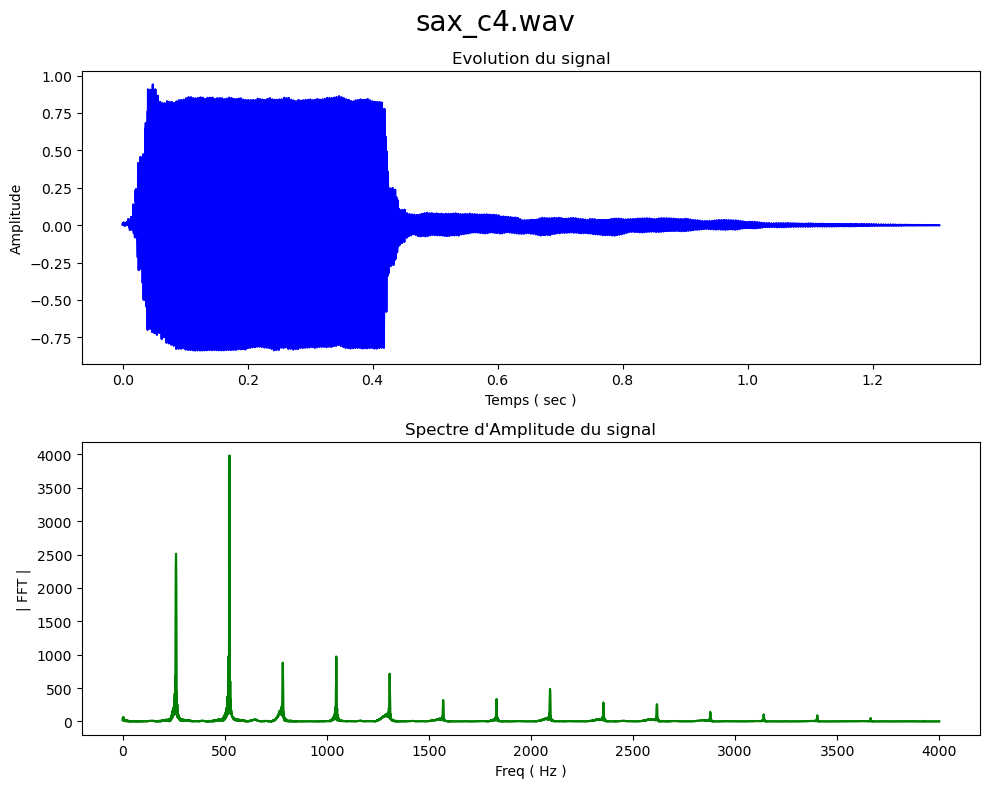

In [20]:
n = 2

FFT3 = Fourrier_Transform("", audio_discrete[n], sampling_rate=sr, maximum_frequence= 4000)
FFT3.transform()
FFT3.plot( style = "MS", title= audio_list[n])

---

- ## <strong> Authors </strong>

 #### <ul> <p> - <strong><a href="https://www.linkedin.com/in/brice-kengni-zanguim/" target="_blank">Brice KENGNI ZANGUIM :</a> </strong></p> <ul> Artificial Intelligence Engeneer at home and holds a PhD in Nano-physic. His research focused on using <strong>Machine Learning, Deep Learning, Signal Processing, Natural langage Processing, Computer Vision and so one</strong> to figure out how the world behave and impact human cognition. Brice KENGNI ZANGUIM has been working at home on mastering his own AI projects in many domains while seeking for a position in a company. </ul></ul>


---

- ## <strong> Other Contributors </strong>

#### <ul>None</ul>

---

- ## <strong> Change Log </strong>

|  Date (DD-MM-YYYY) |  Version | Changed By  |  Change Description |  Purpose  |
|---|---|---|---|---|
| 11- 03 - 2023 | 1.0 | Brice KENGNI ZANGUIM | Updated the file | Mem,save |
|-|-|-|-|
|   |   |   |   |   |

### <h3 align="center"> © BKZ Corporation 2023. All rights reserved. <h3/>
---